# Урок 7. Многомерный статистический анализ. Линейная регрессия

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

$Y = b_0 + b_1 X + E,
b_1 = \frac{\sigma_{XY}}{\sigma^2_X},
b_0 = \overline{Y} - b_1 \cdot {\overline{X}}$

In [2]:
X = np.array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])
y = np.array([9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

$R^2 = 1 - \dfrac{SS_{res}}{SS_{y}}$

In [3]:
def R2(x:np.ndarray, y:np.ndarray):
    
    ones = np.ones((x.shape[0],1))
    x = np.hstack([ones, x])
    
    XTX = x.T.dot(x)
    XTX_inv = np.linalg.inv(XTX)
    
    b = XTX_inv.dot(x.T).dot(y)
    
    z = x.dot(b)
    e = y - z
    
    return 1 - e.var() / y.var()

In [4]:
R2(x=X,y=y)

1.0

In [5]:
for i, j in combinations(range(X.shape[1]), 2):
    r = R2(X[:, [i,j]], y)
    print(i, j, r)

0 1 0.18113594742585215
0 2 0.7634246238793152
0 3 0.4532966783144077
1 2 0.5479482734039011
1 3 0.6062055761129931
2 3 0.622441987650532



$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)}$

In [6]:
R2 = 0.7634246238793152 # натлучштй R2

In [7]:
n = 10
m = 2

k1 = m
k2 = n - m - 1

F = (R2 / k1) / ((1 - R2) / k2)
F

11.29443912292265

In [8]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t #критическая область

4.73741412777588

In [9]:
F>=t # Статистика попала в критическую область, следовательно уравнение регрессии является значимым.

True

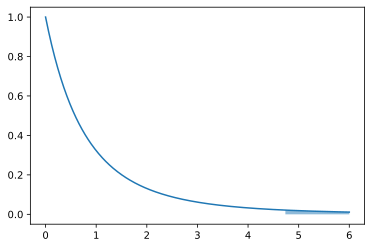

In [10]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

# plt.ylim(0, 0.5)

In [11]:
X.shape, y.shape

((10, 4), (10,))

In [12]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))

X.shape

(10, 5)

In [13]:
X

array([[ 1.        ,  1.22401313,  2.30868478,  3.03636353,  2.69287214],
       [ 1.        , -0.18757272,  1.30337355,  5.12093014,  3.46363202],
       [ 1.        , -0.81094525,  1.82463398,  5.79686488,  1.86159445],
       [ 1.        ,  0.75129018,  2.67392052,  3.65529809,  1.66746094],
       [ 1.        ,  0.00972362,  1.97367255,  2.50594319,  1.69755173],
       [ 1.        , -0.62972637,  0.77750764,  2.84124027,  4.54410559],
       [ 1.        ,  2.29536229,  1.81206697,  1.95026215,  1.51874636],
       [ 1.        ,  0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
       [ 1.        ,  2.39252799,  3.17563985,  3.61420599,  5.10773362],
       [ 1.        ,  0.54983815,  2.87988651,  1.65752765,  1.59635987]])

In [14]:
y

array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
        7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

In [15]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
print(results.summary()) # я не поняла, почему не сходится..

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.935e+17
Date:                Tue, 31 Aug 2021   Prob (F-statistic):           3.71e-43
Time:                        13:10:57   Log-Likelihood:                 174.93
No. Observations:                  10   AIC:                            -339.9
Df Residuals:                       5   BIC:                            -338.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.507e-09   1.33e-08     -0.565      0.5

__Задача 2__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.
6. (доп) Посчитать среднюю ошибку аппроксимации

In [16]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
x1 = salary
y1 = scoring

1) Cтроим модель линейной регрессии в частном случае - парной регрессии:$$ y = b_1 \cdot x + b_0 $$где,$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \: b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$

Коэффициенты линейной регрессии с помощью формул для парной регрессии:

In [17]:
b1 = (np.mean(y1 * x1) - np.mean(y1) * np.mean(x1)) / (np.mean(x1**2) - np.mean(x1)**2)
b0 = np.mean(y1) - b1 * np.mean(x1)
print(f'y = {b1:.4f}x + {b0:.4f}')

y = 2.6205x + 444.1774


In [18]:
# т.е. с увеличением зарплаты на 1 условную единицу кредитный скоринг увеличивается на 2.62 ед

Найдём коэффициенты линейной регрессии с помощью МНК:
Для удобства записи введём дополнительный «фактор» x0 = 1. Поиск коэффициентов линейной регрессии сводится к решению системы линейных уравнений:$$y = X \cdot b$$где b — столбец коэффициентов регрессии, X — матрица объект-признак, y — столбец целевой переменной. Чаще всего такая система не имеет решений, поэтому задача состоит в минимизации расстояния между векторами $X \cdot b$ и $y$:$$(X \cdot b - y)^\top \cdot (X \cdot b - y) \rightarrow \min_b.$$Для такой задачи возможно записать аналитическое решение:$$b = (X^\top X)^{-1} X^\top y.$$

In [19]:
x2 = x1.reshape(-1, 1)

y2 = y1.reshape(-1, 1)
y2

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

К матрице 𝑋 (массив x2) нужно добавить столбец из 1, соответствующий фиктивному фактору.

In [20]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))
x2

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [21]:
XTX = x2.T.dot(x2)

np.linalg.det(XTX) # Определитель не близок к нулю, поэтому запиcываем аналитическое решение:

349464.00000000023

In [22]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)  # Коэффициенты линейной регрессии

[[444.17735732]
 [  2.62053888]]


In [23]:
#Проверим несмещённость уравнения регрессии
x2.dot(b).mean(), y2.mean()

(709.8999999999999, 709.9)

2) Строим scatter plot по данным и отмечаем на нём прямую линейной регрессии, полученную в п. 1.

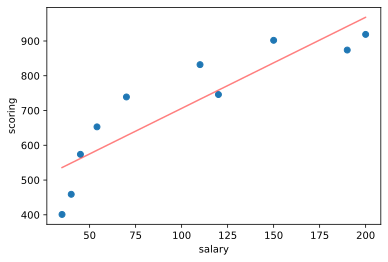

In [24]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('salary')
plt.ylabel('scoring');

3) Считаем коэффициент детерминации

In [25]:
z1 = b0 + b1 * x1
R2 = round(z1.var() / y1.var(), 2)
R2 

0.79

Это значит, что 79% дисперсии переменной 𝑦 учитывается или объясняется моделью. Оставшиеся 21% обусловлены какими-то ещё факторами, которые модель не учла.

4) Оценка построенного уравнения регрессии с помощью F-критерия Фишера.

In [26]:
n = x1.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

In [27]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t #

5.317655071578714

In [28]:
F = (R2 / k1) / ((1 - R2) / k2)
F

30.095238095238102

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

5) Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

In [29]:
#Построим для коэффициента наклона доверительный интервал

def standard_error_slope(x: np.ndarray, y: np.ndarray, z: np.ndarray):
    """Стандартная ошибка коэффициента наклона"""
    n = x.shape[0]
    
    divide = ((y - z) ** 2).sum() / (n - 2)
    dividend = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(divide / dividend)

s_slope = standard_error_slope(x1, y1, z1)
s_slope

0.48108279568516005

In [30]:
# Зададим уровень доверия  𝑝=0.95 , т.е.  𝛼=0.05 . Найдём нужный нам квантиль.
alpha = 0.05
n = x1.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 2)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 2)

t1, t2

(-2.306004135033371, 2.3060041350333704)

In [31]:
# Доверительный интервал для параметра  𝑏1 :
(b1 + t1 * s_slope, b1 + t2 * s_slope) #b1 лежит в интервале

(1.5111599662593715, 3.729917798546158)

In [32]:
#  параметр  𝑏0 :
def standard_error_intercept(x: np.ndarray, y: np.ndarray, z: np.ndarray):
    """Стандартная ошибка коэффициента сдвига"""
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

s_intercept = standard_error_intercept(x1, y1, z1)
s_intercept

56.46649755068153

In [33]:
# Доверительный интервал
(b0 + t1 * s_intercept, b0 + t2 * s_intercept) #b0 лежит в интервале

(313.9653804816363, 574.3893341670829)

6) (доп) Посчитать среднюю ошибку аппроксимации

Если $\overline{A}$ не превышает $8$-$10 \%$, можно сказать, что теоретические значения близки к тем, которые выдает модель линейной регрессии.

In [34]:
A = np.abs((y1 - z1) / y1).mean()
A

0.11469251843561709